# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [745]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


from newsapi import NewsApiClient


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keanumanson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [746]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [747]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [748]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# total amount of articles
print(f"Total articles about Bitcoin: {btc_articles['totalResults']}")

# sample article
btc_articles["articles"][0]

Total articles about Bitcoin: 9555


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [749]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# total amount of articles
print(f"Total articles about Ethereum: {eth_articles['totalResults']}")

# sample article
eth_articles["articles"][0]

Total articles about Ethereum: 4875


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Emma Roth',
 'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
 'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
 'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
 'publishedAt': '2022-04-14T21:43:57Z',
 'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'}

In [784]:
# Create the Bitcoin sentiment scores DataFrame

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialized the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame for sentiments
btc_df = pd.DataFrame(btc_sentiments)

# ReorderingDataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keanumanson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,date,text,compound,positive,negative,neutral
0,2022-05-10T16:59:46Z,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04T12:00:00Z,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-04-14T11:35:49Z,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02T11:30:00Z,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-05-09T03:04:37Z,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [785]:
# Create the Ethereum sentiment scores DataFrame
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialized the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame for sentiments
eth_df = pd.DataFrame(eth_sentiments)

# ReorderingDataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keanumanson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,date,text,compound,positive,negative,neutral
0,2022-04-14T21:43:57Z,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13T16:35:03Z,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-05-10T13:10:20Z,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
3,2022-04-15T11:37:13Z,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
4,2022-05-02T15:54:35Z,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879


In [783]:
# Describe the Bitcoin Sentiment
btc_sentiment_stats = btc_df.describe() #saved as a variable for when we want to use the stats later
btc_sentiment_stats

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.030427,0.060650,0.056160,0.883190
std,0.426500,0.064645,0.069564,0.087121
min,-0.817600,0.000000,0.000000,0.557000
25%,-0.273200,0.000000,0.000000,0.829750
50%,0.000000,0.059000,0.046500,0.893500
75%,0.340000,0.097500,0.080500,0.941250
max,0.865500,0.263000,0.279000,1.000000


In [753]:
# Describe the Ethereum Sentiment
eth_sentiment_stats = eth_df.describe()
eth_sentiment_stats

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.091054,0.074820,0.047310,0.877860
std,0.456420,0.084477,0.059814,0.089935
min,-0.836000,0.000000,0.000000,0.622000
25%,-0.273200,0.000000,0.000000,0.825000
50%,0.025800,0.058000,0.034500,0.901500
75%,0.430825,0.129000,0.074000,0.937250
max,0.952000,0.378000,0.234000,1.000000


In [754]:
def coin_sentiment_results(): #function to display the scores
    print('Mean Positive score:')
    print('Btc', btc_sentiment_stats['positive']['mean'])
    print('Eth', eth_sentiment_stats['positive']['mean'])

    print('\nHighest compound score:') #highest... not mean.
    print('Btc', btc_sentiment_stats['compound']['mean'])
    print('Eth', eth_sentiment_stats['compound']['mean'])

    print('\nHighest positive score:') #max? is that what we want
    print('Btc', btc_sentiment_stats['positive']['max'])
    print('Eth', eth_sentiment_stats['positive']['max'])

coin_sentiment_results()

Mean Positive score:
Btc 0.06064999999999997
Eth 0.07482

Highest compound score:
Btc 0.03042700000000001
Eth 0.091054

Highest positive score:
Btc 0.263
Eth 0.378


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth has the highest mean positive score

Q: Which coin had the highest compound score?

A: Eth had the highest compound mean score

Q. Which coin had the highest positive score?

A: Eth had the highest positive score for a single article

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [755]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [756]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_extras = ['status', 'ok', 'id', 'name', 'source', 'author', 'title', 'url', 'description', 'urlToImage', 'publishedAt', 'totalresults', 'articles', 'urltoimage', '', '', '', '', '', '', '', '']

In [757]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text)) #had to convert floats (numbers in the articles into strings to be compatable with the functions)

    # Create a tokenized list of the words
    word_list = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    result = [lemmatizer.lemmatize(word) for word in word_list]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in word_list if word.lower() not in sw.union(sw_extras)]    
        
    return output

#print(tokenizer(btc_articles))

In [758]:
# Create a new tokens column for Bitcoin
btc_articles

btc_df_tokens_column = pd.DataFrame(tokenizer(btc_articles))

btc_df_tokens_column

,0
0,wired
1,wired
2,arielle
3,pardes
4,miamis
...,...
5347,februaryrnspot
5348,gold
5349,dropped
5350,around


In [759]:
# Create a new tokens column for Ethereum
eth_df_tokens_column = pd.DataFrame(tokenizer(eth_articles))

eth_df_tokens_column.head(20)

,0
0,theverge
1,verge
2,emma
3,roth
4,us
5,blames
6,north
7,korean
8,hacker
9,group


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [760]:
from collections import Counter
from nltk import ngrams

In [807]:
# Generate the Bitcoin N-grams where N=2
word_counts_btc = Counter(tokenizer(btc_df_tokens_column))
print(dict(word_counts_btc.most_common(20)), "\n")

#bigram count where N=2
bigram_counts_btc = Counter(ngrams(word_counts_btc, n=2))
print(dict(bigram_counts_btc))

{'wired': 2, 'arielle': 1, 'pardes': 1, 'miamis': 1, 'februaryrnspot': 1, 'gold': 1, 'dropped': 1, 'around': 1, 'chars': 1, 'rows': 1, 'x': 1, 'columns': 1} 

{('wired', 'arielle'): 1, ('arielle', 'pardes'): 1, ('pardes', 'miamis'): 1, ('miamis', 'februaryrnspot'): 1, ('februaryrnspot', 'gold'): 1, ('gold', 'dropped'): 1, ('dropped', 'around'): 1, ('around', 'chars'): 1, ('chars', 'rows'): 1, ('rows', 'x'): 1, ('x', 'columns'): 1}


In [834]:
# Generate the Ethereum N-grams where N=2
word_counts_eth = Counter(tokenizer(eth_df_tokens_column))
print(dict(word_counts_eth.most_common(20)), "\n")

#bigram count where N=2
bigram_counts_eth = Counter(ngrams(word_counts_eth, n=2))
print(dict(bigram_counts_eth))

{'theverge': 1, 'verge': 1, 'emma': 1, 'roth': 1, 'us': 1, 'valued': 1, 'usd': 1, 'november': 1, 'value': 1, 'chars': 1, 'rows': 1, 'x': 1, 'columns': 1} 

{('theverge', 'verge'): 1, ('verge', 'emma'): 1, ('emma', 'roth'): 1, ('roth', 'us'): 1, ('us', 'valued'): 1, ('valued', 'usd'): 1, ('usd', 'november'): 1, ('november', 'value'): 1, ('value', 'chars'): 1, ('chars', 'rows'): 1, ('rows', 'x'): 1, ('x', 'columns'): 1}


In [835]:
# Function token_count generates the top 10 words for a given coin

def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    word_counts = Counter(tokens)
    print(dict(word_counts.most_common(10))) 
    return Counter(tokens).most_common(N)

In [836]:
# Use token_count to get the top 10 words for Bitcoin
print("top 10 words for Bitcoin:")
token_count(btc_df_tokens_column[0])

top 10 words for Bitcoin:
{'bitcoin': 165, 'reuters': 147, 'publishedat': 100, 'tz': 100, 'content': 100, 'chars': 91, 'none': 75, 'cryptocurrency': 69, 'crypto': 61, 'cryptocurrencies': 38}


[('bitcoin', 165), ('reuters', 147), ('publishedat', 100)]

In [837]:
# Use token_count to get the top 10 words for Ethereum
print("top 10 words for Ethereum:")
token_count(eth_df_tokens_column[0])

top 10 words for Ethereum:
{'content': 102, 'publishedat': 100, 'tz': 100, 'chars': 100, 'none': 75, 'bitcoin': 61, 'ethereum': 61, 'cryptocurrency': 56, 'crypto': 54, 'reuters': 44}


[('content', 102), ('publishedat', 100), ('tz', 100)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [812]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

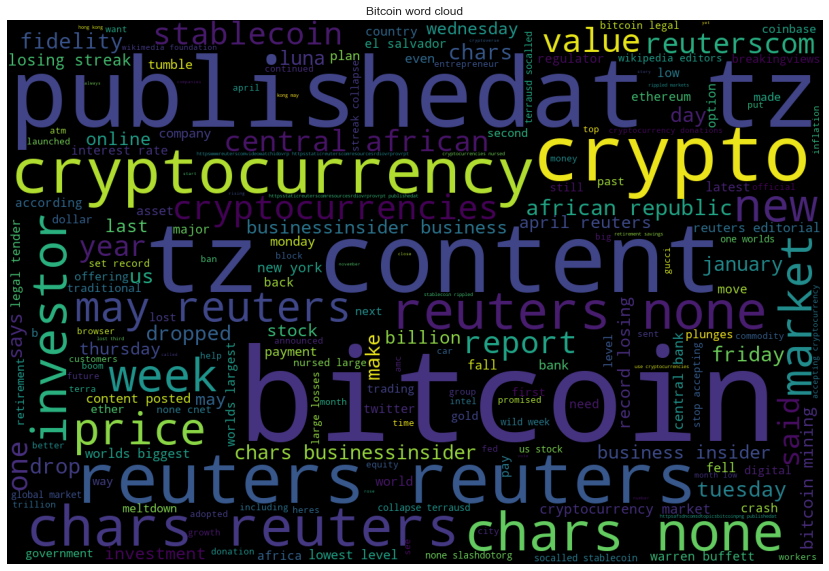

In [816]:
# Generate the Bitcoin word cloud
#removes ' from the end of each word, for some reason there was a ' at the end of each word
btc_wordcloud_words = btc_wordcloud_words.replace("'", "")

wordcloud = WordCloud(width=1200, height=800).generate(btc_wordcloud_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Bitcoin word cloud")
plt.show()

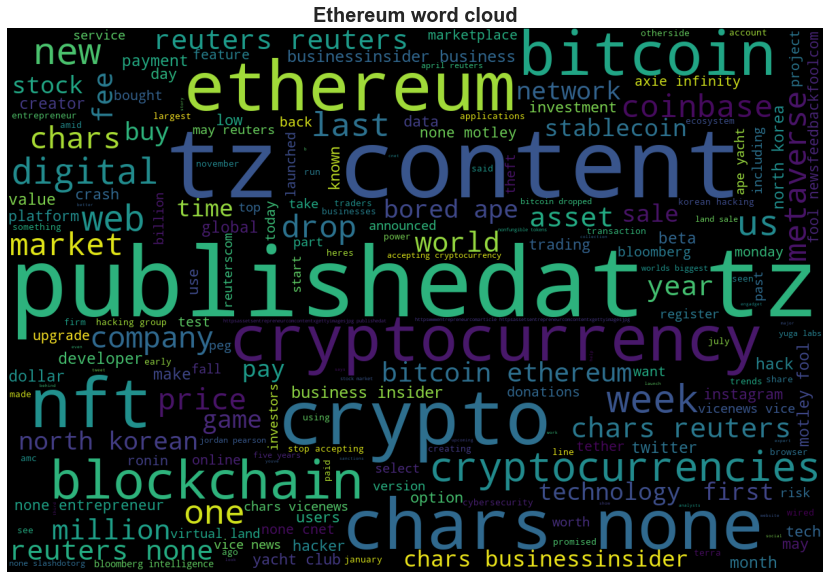

In [820]:
# Generate the Ethereum word cloud
eth_wordcloud_words = eth_wordcloud_words.replace("'", "")

wordcloud = WordCloud(width=1200, height=800).generate(eth_wordcloud_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Ethereum word cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [821]:
import spacy
from spacy import displacy

In [822]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [823]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [824]:
# Concatenate all of the Bitcoin text together
word_btc_block_ = ' '.join(btc_df_tokens_column[0])
print(type(word_btc_block_))

<class 'str'>


In [773]:
# Run the NER processor on all of the text
doc_btc = nlp(word_btc_block_)

# Add a title to the document
doc_btc.user_data['title'] = "Bitcoin NER Visualisation"

In [774]:
# Render the visualization
displacy.render(doc, style='ent')

In [843]:
# List all Entities
#also can do this to store the list:
#All entities:
btc_ent_list = [ent.text for ent in doc_btc.ents if ent.label_]

print(btc_ent_list)

['arielle pardes', 'linden', 'texas', 'april', 'matt novak', 'warren buffett', 'warren buffett', 'weekend buffett', 'warren buffett', 'weekend buffett', 'bbc news', 'november', 'fall weekend', 'elizabeth warren', 'luckrnlast week', 'fidelity investments', 'treasury', 'treasury', 'first', 'httpswwwengadgetcomustreasurysanctionsvirtualcurrencymixernorthkoreahtml httpssyimgcomoscreatruploadedimagesdbecadeedfcace', 'treasury', 'arstechnica', 'lee wikipedia', 'month', 'month', 'last july', 'week', 'last week', 'reuters', 'reuters', 'tuesday', 'httpswwwreuterscomresizergpblvbdvghskyiwvkicuxsmartfiltersqualitycloudfrontuseastimagesarcpublishingcomreutersbtdvibjnqbljihwyngsyqjpg', 'april', 'reuters', 'tuesday', 'years', 'reuters', 'reuters', 'wednesday', 'reuters', 'wednesday', 'years', 'reuters', 'reuters', 'reuters', 'reuters', 'gucci', 'weeks', 'gucci', 'weeks', 'reuters', 'reuters', 'wednesday', 'httpswwwreuterscomresizerleayorctpjzoemijrjfylqkxsmartfiltersqualitycloudfrontuseastimagesarcp

In [840]:
#remove links httpswww.....
#this removes the links, by making a list with strings from the list only if they are below 30 characters, with all the links being way above that. 
new_string_btc = ' '.join([w for w in btc_ent_list if len(w)<30])

new_string_btc

'arielle pardes linden texas april matt novak warren buffett warren buffett weekend buffett warren buffett weekend buffett bbc news november fall weekend elizabeth warren luckrnlast week fidelity investments treasury treasury first treasury arstechnica lee wikipedia month month last july week last week reuters reuters tuesday april reuters tuesday years reuters reuters wednesday reuters wednesday years reuters reuters reuters reuters gucci weeks gucci weeks reuters reuters wednesday reuters wednesday reuters reuters monday reuters monday kevin hurler april april moviego gian mexican london weeks ago luna january mac android january mac android rookie reuters reuters kourtnee jackson second central african republic second el salvador wednesday hannah million el salvador el salvador first september el salvador first september million reuters reuters central african april reuters central african african republic reuters central african republic wednesday first second april reuters central

---

### Ethereum NER

In [777]:
# Concatenate all of the Ethereum text together
word_eth_block_ = ' '.join(eth_df_tokens_column[0])

In [778]:
# Run the NER processor on all of the text
doc_eth = nlp(word_eth_block_)


# Add a title to the document
doc_eth.user_data['title'] = "Ethereum NER Visualisation"

In [779]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [844]:
# List all Entities
#All entities:
eth_ent_list = [ent.text for ent in doc_eth.ents if ent.label_]

print(eth_ent_list)

['north korean', 'us department treasury', 'north korean', 'httpscdnvoxcdncomthumborntgcqcuduhpibtgxliowaixxfitinxcdnvoxcdncomuploadschorusassetfilescreenshotatampng', 'us treasury department', 'north korean', 'networ', 'arstechnica', 'lee wikipedia', 'january', 'mac android', 'january', 'mac android', 'httpsiguimcoukimgmediaebaabdbcdadmasterjpgwidthheightqualityautoformatfitcropoverlayalignbottomcleftoverlaywidthpoverlaybaselltzyzdgfawmvbzlcmxhexmvdgctzgvmyxvsdcwbmcenableupscalescbcfdfaeafaf', 'daniel van boom', 'hours', 'thousands', 'april', 'crypto dodge sanctions ethereum developer', 'five years', 'north korea', 'five years', 'north korea', 'nbc news', 'reuters', 'april', 'reuters', 'httpsimgcdntnwcdncomimagehardforkfilterlastfitcurlhttpsaffcdntnwcdncomfwpcontentfblogsdirfffilesfffuntitleddesignjpgsignaturedbebebeefcfbeaee', 'kevin hurler', 'april', 'april', 'moviego', 'slashdotorg', 'last night', 'bloomberg', 'nearly third billion dollars', 'last night', 'bloomberg', 'one', 'one',

In [845]:
#remove links httpswww.....
#this removes the links, by making a list with strings from the list only if they are below 30 characters, with all the links being way above that. 
new_string_eth = ' '.join([w for w in eth_ent_list if len(w)<30])

new_string_eth

'north korean us department treasury north korean us treasury department north korean networ arstechnica lee wikipedia january mac android january mac android daniel van boom hours thousands april five years north korea five years north korea nbc news reuters april reuters kevin hurler april april moviego slashdotorg last night bloomberg nearly third billion dollars last night bloomberg one one million early week slovakian november days ago third week around billion days ago third week david panbloomberg one months first dan robinson first dan robinson august reuters reuters tuesday april reuters tuesday years reuters reuters wednesday reuters wednesday years reuters reuters wednesday reuters wednesday reuters reuters monday reuters monday bayc metaverse mint thousands dollars last week thousands dollars last week arstechnica lhr tech month month last july week last week monday polygon july virtually july coali bbc news november fall weekend paul kim reuters april reuters reuters gucci

---